# Scikit-Learn Interface

`Scikit-learn` or in brief naming `sklearn` - is a library in which already implemented nearly all the modern algorithms of ML.

For implementation of an ML algorithm in `sklearn` always uses the same interface - a class with functions fit(X, Y) for training of the model on on X,Y train datasets, and predict(Z) for returning of predictions on test dataset Z. While making the class you can specify additional parameters inluencing on work of the ML algorithm.

Besides libraries for training of the ML models in sklearn are implemented auxilary methods for data preprocessing, data visualization, calculation of quality metrics, etc.

## Data Preprocessing

In [1]:
import pandas as pd
import numpy as np

For demonstration we will download Automobile Data Set in which are presented categorical features.

ML problem here is to predict the price of automobile.

In [2]:
X_raw = pd.read_csv(
    "Automobile_data.csv",
    header=None,
    na_values=['?']
)
X_raw.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


Divide features and target variable:

In [3]:
y = X_raw[25]
X_raw = X_raw.drop(25, axis=1)

### Filling the gaps in features

In an objects-features matrix may be gaps, and it may be a cause of falling of the ML algorithm of even data preprocessing process.

If number of gaps is small, you can just remove the columns or raws, but if number is significant, you must fill the gaps.
You can do it by the following ways:
* Fill by the means (mean, median)
* Predict gaps by other values in the raw

The last option is difficult and quite rarely used. For filling by constants you can use `fillna` method and fill them by means - class `impute.SimpleImputer`.

Check whether there are gaps in our data:

In [4]:
# Check for gaps at all

X_raw.isnull().any().any()

True

In [5]:
# Check summ of gaps in features by particular columns

X_raw.isnull().sum()

0      0
1     41
2      0
3      0
4      0
5      2
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     4
19     4
20     0
21     2
22     2
23     0
24     0
dtype: int64

In [6]:
from sklearn.impute import SimpleImputer

In [7]:
# making a mask on data
cat_features_mask = (X_raw.dtypes == 'object').values # True if it is categorical feature

# for real-number features fill the gaps by means
X_real = X_raw[X_raw.columns[~cat_features_mask]] # ~ means negation (non-categorical features)
mis_replaser = SimpleImputer(strategy="mean")
X_no_mis_real = pd.DataFrame(data=mis_replaser.fit_transform(X_real), columns=X_real.columns)

# for categorical features by empty raws
X_cat = X_raw[X_raw.columns[cat_features_mask]].fillna("")
X_no_mis = pd.concat([X_no_mis_real, X_cat], axis=1)

X_no_mis.head()

,0,1,9,10,11,12,13,16,18,19,...,2,3,4,5,6,7,8,14,15,17
0,3.0,122.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,...,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,3.0,122.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,...,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,1.0,122.0,94.5,171.2,65.5,52.4,2823.0,152.0,2.68,3.47,...,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,2.0,164.0,99.8,176.6,66.2,54.3,2337.0,109.0,3.19,3.40,...,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,2.0,164.0,99.4,176.6,66.4,54.3,2824.0,136.0,3.19,3.40,...,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi


### Transforms of non-numerical features

Because letters can be represented by numers in ASCII codification, you must check whether you can use your data as numbers, even if in your table you see numbers (especially integer numbers) - it may be a letter or a word. Another example - ID of some user or object. It usually represented by long integer number but you can't, for instance, sum two ID.

THe examples above are examples of categorical features. To such features usually apply one-hot encoding (instead of one feature you make **K** binary features - one for each possible value of original featuure). In `sklearn` it may be made with classes `LabelEncoder` plus `OneHotEncoding`, but is much easier to use function `get_dummies` from `pandas`.

<u>Note</u>: In the object-feature matrix will be many zero values. To avoid of store all these zero values you can use parameter `OneHotEncoder(sparse=True)` or `pandas.get_dummies(sparse=True)`. In this case the method will return to you a sparse matrix with only non-zero values.
Operations with such a matrix may be not effective, but most of methods of `sklearn` can deal with such matrices.

You can see an example below:

In [8]:
print(f"Shape before encoding: {X_no_mis.shape}")
X_dum = pd.get_dummies(X_no_mis, drop_first=True)
print(f"Shape after encoding: {X_dum.shape}")

Shape before encoding: (205, 25)
Shape after encoding: (205, 66)


In [9]:
X_dum

,0,1,9,10,11,12,13,16,18,19,...,15_three,15_twelve,15_two,17_2bbl,17_4bbl,17_idi,17_mfi,17_mpfi,17_spdi,17_spfi
0,3.0,122.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,...,False,False,False,False,False,False,False,True,False,False
1,3.0,122.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,...,False,False,False,False,False,False,False,True,False,False
2,1.0,122.0,94.5,171.2,65.5,52.4,2823.0,152.0,2.68,3.47,...,False,False,False,False,False,False,False,True,False,False
3,2.0,164.0,99.8,176.6,66.2,54.3,2337.0,109.0,3.19,3.40,...,False,False,False,False,False,False,False,True,False,False
4,2.0,164.0,99.4,176.6,66.4,54.3,2824.0,136.0,3.19,3.40,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1.0,95.0,109.1,188.8,68.9,55.5,2952.0,141.0,3.78,3.15,...,False,False,False,False,False,False,False,True,False,False
201,-1.0,95.0,109.1,188.8,68.8,55.5,3049.0,141.0,3.78,3.15,...,False,False,False,False,False,False,False,True,False,False
202,-1.0,95.0,109.1,188.8,68.9,55.5,3012.0,173.0,3.58,2.87,...,False,False,False,False,False,False,False,True,False,False
203,-1.0,95.0,109.1,188.8,68.9,55.5,3217.0,145.0,3.01,3.40,...,False,False,False,False,False,True,False,False,False,False


### Scaling of features

While starting the work with you data it's recommended to bring all the features to the same scale. It's important to keep numerical robust while working with objects-features matrix: 
* Numerical error will be collected during calculation near zero on each iteration because of loss data in positions far from floating dot - addition or substraction can return the same result as it was before because significant numbers are located further than resolution of your operational system let your algorithm see.
* Dividing by numbers near zero makes very huge numbers and it also provides loss of data during further additions or subtractions, especially during arithmetical operations with small numbers.

Moreover, if you speak about ML, scaling of features provides increasing of interpretivism of you model's results.

A popular method of scaling is normalization - subtraction of mean from each value and dividing of the difference by standard deviation (`StandardScaler` in `sklearn`).
Second popular method is subtraction of the minimum from each feature and then dividing by difference of maximal and minimal value (`MinMaxScaler` in `sklearn`).

In [11]:
from sklearn import preprocessing

In [12]:
normalizer = preprocessing.MinMaxScaler()

X_dum.columns = X_dum.columns.astype(str) # It's needed because fit_transform works only with str columns

X_real_norm_np = normalizer.fit_transform(X_dum)
X = pd.DataFrame(data=X_real_norm_np)
X.head()

,0,1,2,3,4,5,6,7,8,9,...,56,57,58,59,60,61,62,63,64,65
0,1.0,0.298429,0.058309,0.413433,0.316667,0.083333,0.411171,0.260377,0.664286,0.290476,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.298429,0.058309,0.413433,0.316667,0.083333,0.411171,0.260377,0.664286,0.290476,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.6,0.298429,0.230321,0.449254,0.433333,0.383333,0.517843,0.343396,0.100000,0.666667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.8,0.518325,0.384840,0.529851,0.491667,0.541667,0.329325,0.181132,0.464286,0.633333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.8,0.518325,0.373178,0.529851,0.508333,0.541667,0.518231,0.283019,0.464286,0.633333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## K nearest Neighbours method

In [1]:
import numpy as np
import pandas as pd
import sklearn

In [2]:
# pictures of digits (MNIST)
from sklearn.datasets import load_digits

# classificator
from sklearn.neighbors import KNeighborsClassifier

# shuffler
from sklearn.utils import shuffle

In [3]:
clf = KNeighborsClassifier(n_neighbors=3)

data = load_digits()
X = data.images
Y = data.target

X.shape

(1797, 8, 8)

In [4]:
from matplotlib import pyplot as plt

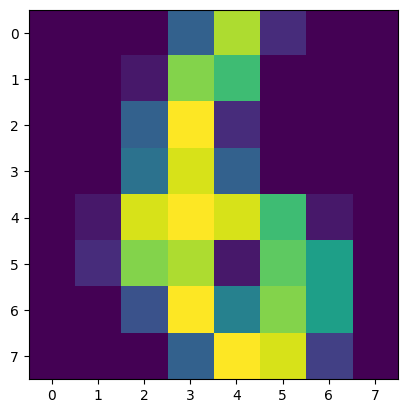

In [5]:
plt.imshow(X[34])

In [6]:
# Because we want to deal with vectors, we should squeeze the pictures into vectors
# This way we'll obtain object-feature matrix (With size of Features shape - Target shape)

X = X.reshape(X.shape[0], -1)

# Shuffle the data
X, Y = shuffle(X, Y)

print(f"Features shape: {X.shape}, \nTarget shape: {Y.shape}")
print(f"Target samples: {Y[:10]}")

Features shape: (1797, 64), 
Target shape: (1797,)
Target samples: [1 1 4 7 5 5 7 0 9 8]


In [7]:
X_train, Y_train = X[:700, :], Y[:700]
X_val, Y_val = X[700:1300, :], Y[700:1300]
X_test, Y_test = X[1300:, :], Y[1300 :]

In [8]:
# Training of classifier and making of predictions

clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)

In [9]:
# Calculation of accuracy

print(f"Accuracy: {np.mean(Y_test == Y_pred)}")

Accuracy: 0.9778672032193159


Now let's try to use validation dataset. It's needed here to find the best value of k for the model in point of accuracy (cross validation).

In [12]:
k_best = -1
best_accuracy = 0

for k in range(1, 20):
    Y_pred = KNeighborsClassifier(n_neighbors=k).fit(X_train, Y_train).predict(X_val)
    
    val_accuracy = np.mean(Y_pred==Y_val)

    if val_accuracy > best_accuracy:
        best_accuracy = val_accuracy
        k_best = k

print(f"The best k equals {k_best} \nWith accuracy {best_accuracy}")

The best k equals 1 
With accuracy 0.985
